# 1. Moment-Generating Functions of linear transformations of random variables 

## (1a)
\begin{align}
M_Y(t) & = \int_xe^{ty}\cdot f(c|\theta)dx \\
&=\int_xe^{t(\mu+\sigma x)}\cdot f(c|\theta)dx \\
&=\int_x e^{t\mu}e^{\sigma x}\cdot f(c|\theta)dx \\
&=e^{t\mu} \int_x e^{\sigma x}\cdot f(c|\theta)dx \\
&=e^{t\mu} M_x(\sigma t)
\end{align}

## (1b)


 By completing the squares of the exponent, we get:
\begin{align}
 E[e^{tx}] &= \int_{- \infty}^{+ \infty} e^{tx}f(x)dx \\
 &= \int_{- \infty}^{+ \infty} \frac{1}{\sqrt{2\pi}} e^{tx- \frac{1}{2}x^2}dx \\
 &= \int_{- \infty}^{+ \infty} \frac{1}{\sqrt{2\pi}} e^{- \frac{1}{2}(x^2-2tx+t^2-t^2)}dx \\
 &= \int_{- \infty}^{+ \infty} \frac{1}{\sqrt{2\pi}} e^{- \frac{1}{2}((x-t)^2-t^2)}dx \\
 &= e^{\frac{1}{2}t^2} \int_{- \infty}^{+ \infty} \frac{1}{\sqrt{2\pi}} e^{- \frac{1}{2}(x-t)^2}dx \\
 &= e^{\frac{1}{2}t^2}\cdot 1
\end{align}

## (1c)

By using the properties of variance and expectation:

\begin{align}
Y &= \mu + \sigma\times X \\
\Rightarrow &E[Y] = \mu+0 = \mu \\
\Rightarrow &Var(Y) = \sigma^2 \cdot 1 = \sigma^2 \\
\Rightarrow &Y  \sim N(\mu, \sigma^2)
\end{align}


## (1d)
\begin{align}
M_Y(t) &= e^{\mu t}M_X(\sigma t)\\
&=e^{\mu t} \cdot e^{\frac{1}{2} \sigma^2 t^2}\\
&=e^{\mu t + \frac{1}{2} \sigma^2 t^2}
\end{align}
Which is the same as the MGF of $N(\mu, \sigma^2)$.

 # 2. Normal Q-Q Plots: Motivation and Computational Derivation {-}

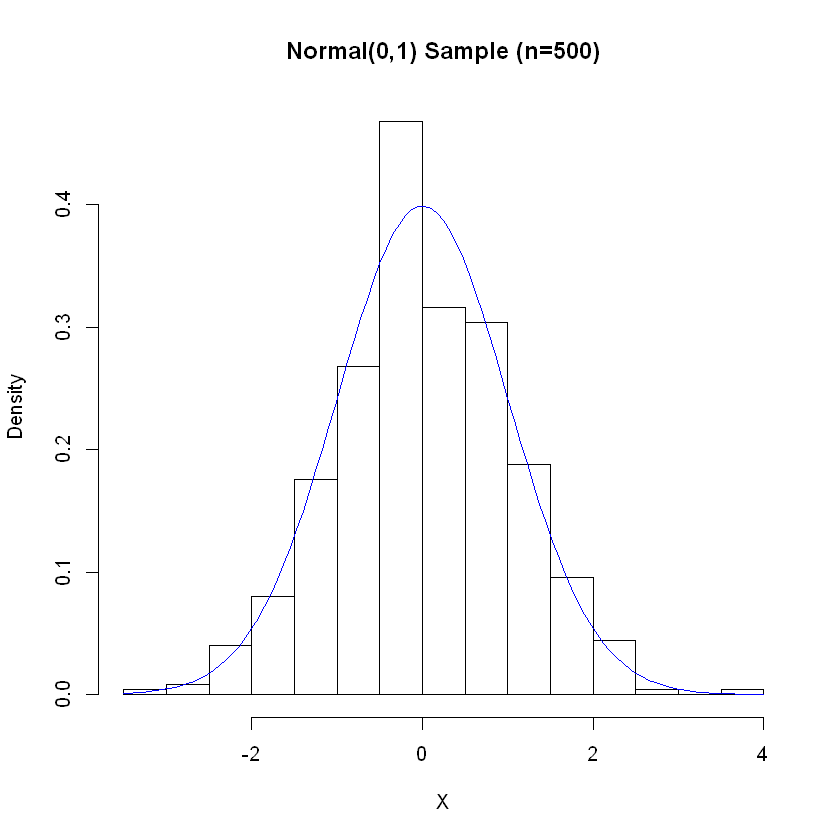

In [2]:
set.seed(1);n=500; X=rnorm(n)
hist(X, main="Normal(0,1) Sample (n=500)", freq=FALSE) 
f=function(x){dnorm(x)} 
X.density=curve(f, add=TRUE, col='blue')


## (2a)

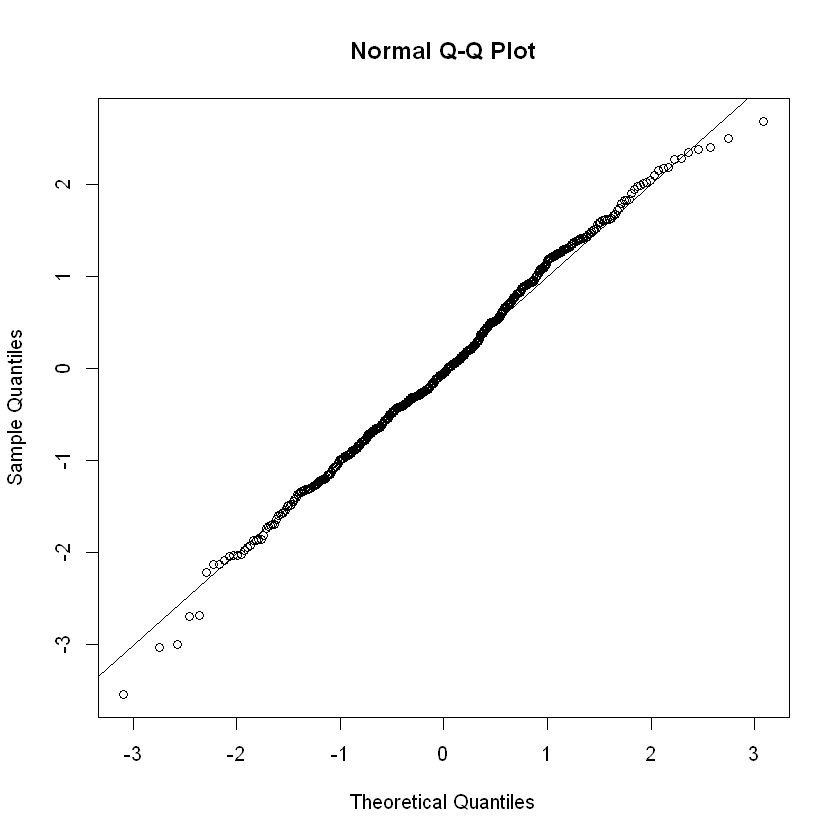

In [17]:
par(mfcol=c(1,1)) 
qqnorm(X) 
abline(0,1)

The distribution seems very close to normal, as all the points almost lie on the line. However there are small discrepencies, especially towards the tails.

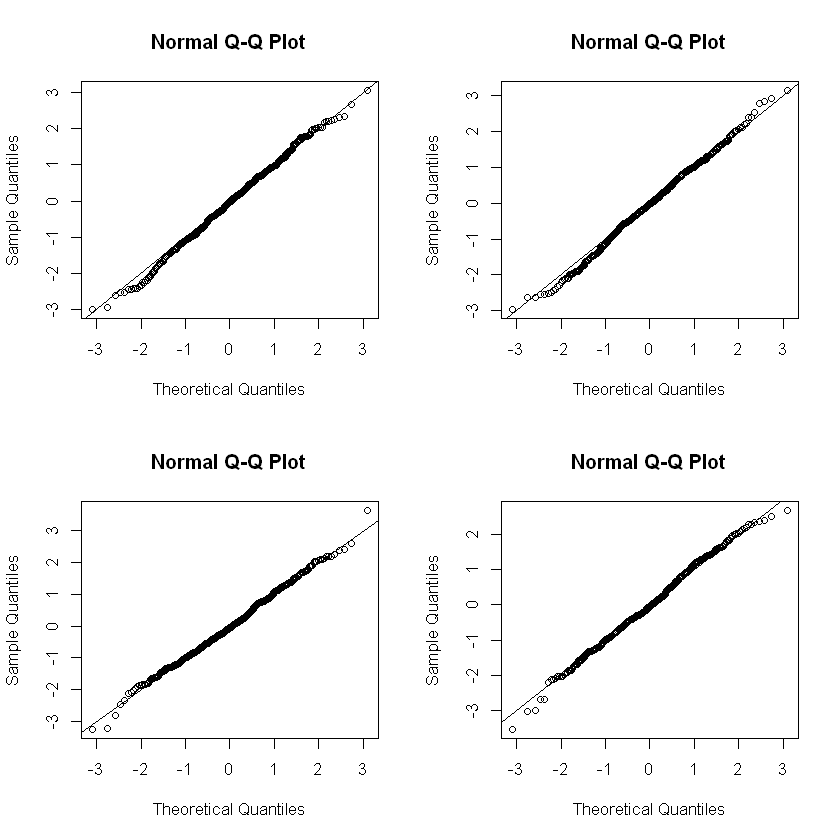

In [23]:
par(mfcol=c(2,2)) 
X=rnorm(n)
qqnorm(X) 
abline(0,1)
X=rnorm(n)
qqnorm(X) 
abline(0,1)
X=rnorm(n)
qqnorm(X) 
abline(0,1)
X=rnorm(n)
qqnorm(X) 
abline(0,1)


All the plots look fairly similar, especially towards the center. However, towards the ends the plots seem a bit more inconsistent. 

## (2b)

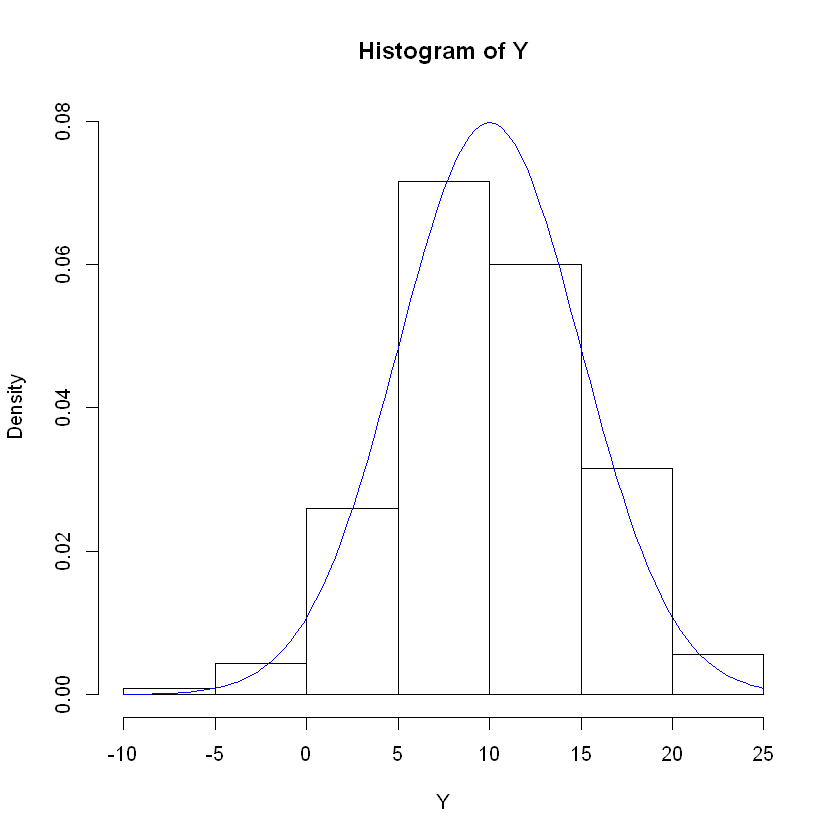

In [48]:
Y = 10.+5.∗X
hist(Y, freq = FALSE, ylim = range(0,0.08))
f=function(y){dnorm(y, mean = 10, sd = 5.)} 
curve(f, add=TRUE, col='blue')
#curve(dnorm(Y, mean =0, sd = 1))

## (2c)

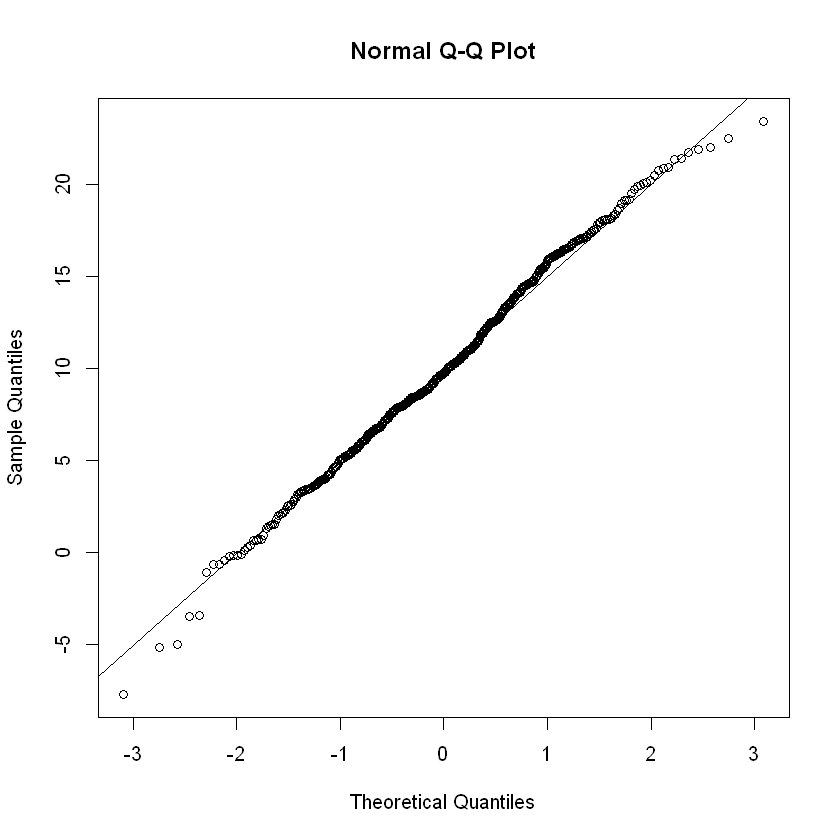

In [47]:
qqnorm(Y)
abline(10,5)

The points fit very closely to a line because they are on a normal distribution. The QQ line has an intercept of 10 and slope of 5.

## (2d)

In [51]:
# Create matrix of of the 1000 samples of size 500 
nsamples=1000 
samplesize=500 
mat.samples=matrix(rnorm(nsamples*samplesize), nrow=samplesize, ncol=nsamples) 
# Use apply() to sort each column of mat.samples 
# so that each row consists of random sample 
# of the respective order statistic 
mat.samples.orderstats=apply(mat.samples,2,sort) 
# Use rowMeans() to approximate the expected value of order statistics 
mat.samples.orderstats.rowMeans=rowMeans(mat.samples.orderstats)


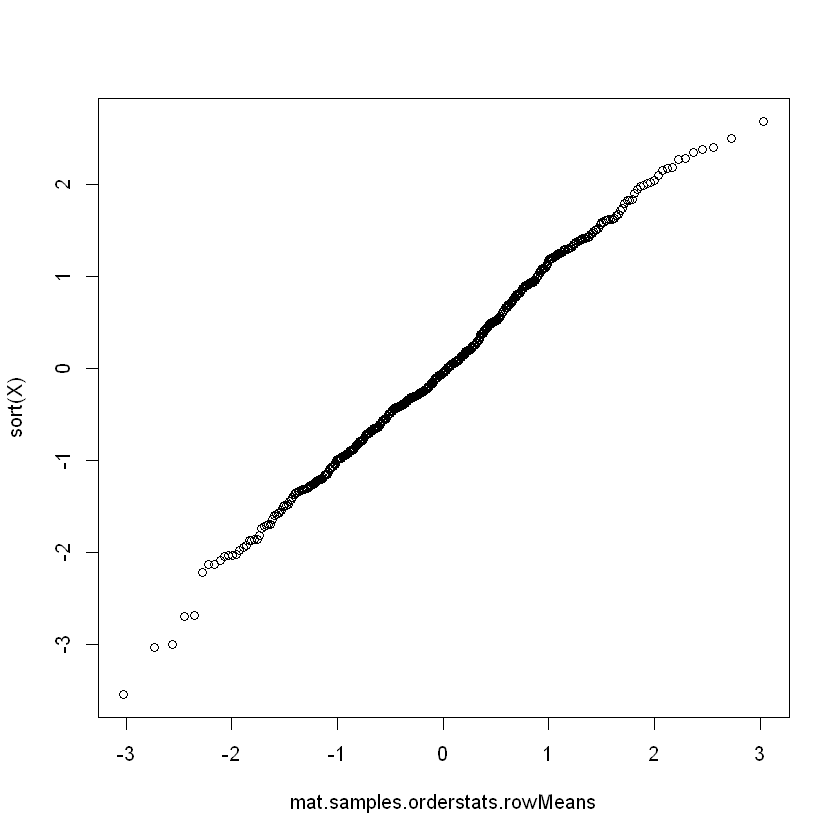

In [68]:
plot(mat.samples.orderstats.rowMeans,sort(X))

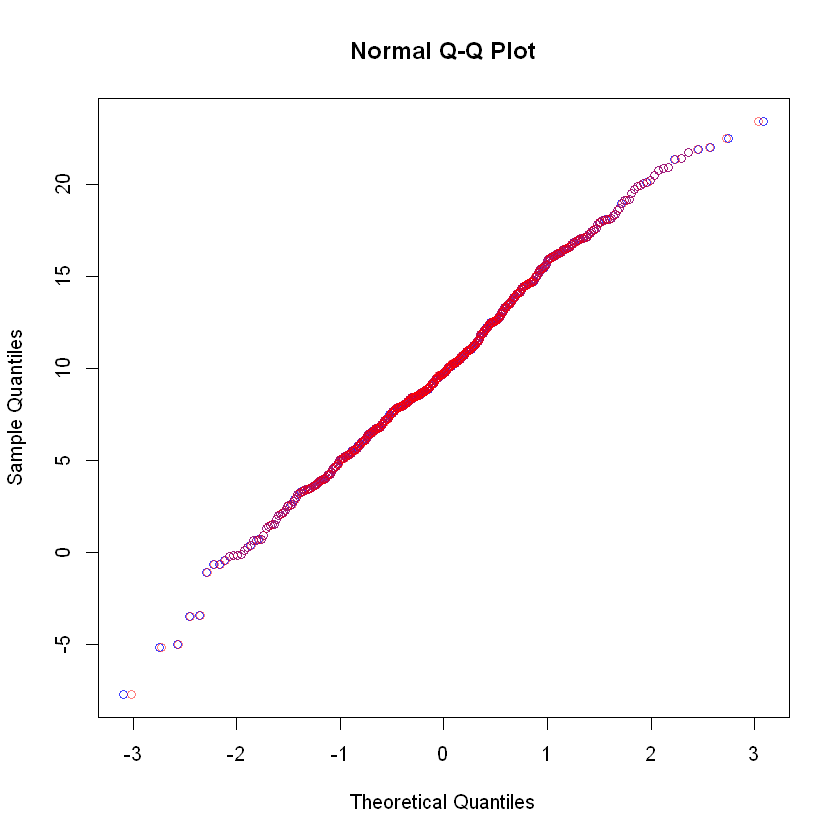

In [89]:
qqnorm(Y, col = rgb(0, 0, 1, 0.75))
points(mat.samples.orderstats.rowMeans, sort(Y), col = rgb(1, 0, 0, 0.5))



It can be seen that the two plots are almost identical. The points of the qqnorm function are plotted in blue, while those produced by the approximated values are in red color. The points align so closely that it is hard to even discern the different points.

# Problem 3

## (3a)
\begin{align}
M_X(t) &= \int_0^{\infty} e^{tx} \cdot \frac{\beta^\alpha x^{\alpha-1}}{\Gamma(\alpha)}e^{-\beta x}dx \\
&= \frac{\beta^\alpha }{\Gamma(\alpha)} \int_0^{\infty} e^{tx} \cdot x^{\alpha-1}e^{-\beta x}dx \\
&= \frac{\beta^\alpha }{\Gamma(\alpha)} \int_0^{\infty} x^{\alpha-1}e^{-(\beta-t) x}dx \\
&= \frac{\beta^\alpha }{\Gamma(\alpha)} \int_0^{\infty} (\frac{y}{\beta-t})^{\alpha-1}e^{-y}\frac{1}{\beta-t}dx \\
&= \frac{\beta^\alpha }{\Gamma(\alpha) (\beta-t)^\alpha} \int_0^{\infty} (y)^{\alpha-1}e^{-y}dx \\
&= \frac{\beta^\alpha}{(\beta-t)^\alpha}
\end{align}




## (3b)

\begin{align}
M_S(t) & = \prod _{i=1} ^n M_{X_i}(t) \\
&= \prod _{i=1} ^n \frac{\beta^\alpha}{(\beta-t)^\alpha}\\
&= \Big( \frac{\beta^\alpha}{(\beta-t)^\alpha}\Big) ^n \\
&= \frac{\beta^{\alpha n}}{(\beta-t)^{\alpha n}}
\end{align}

## (3c)



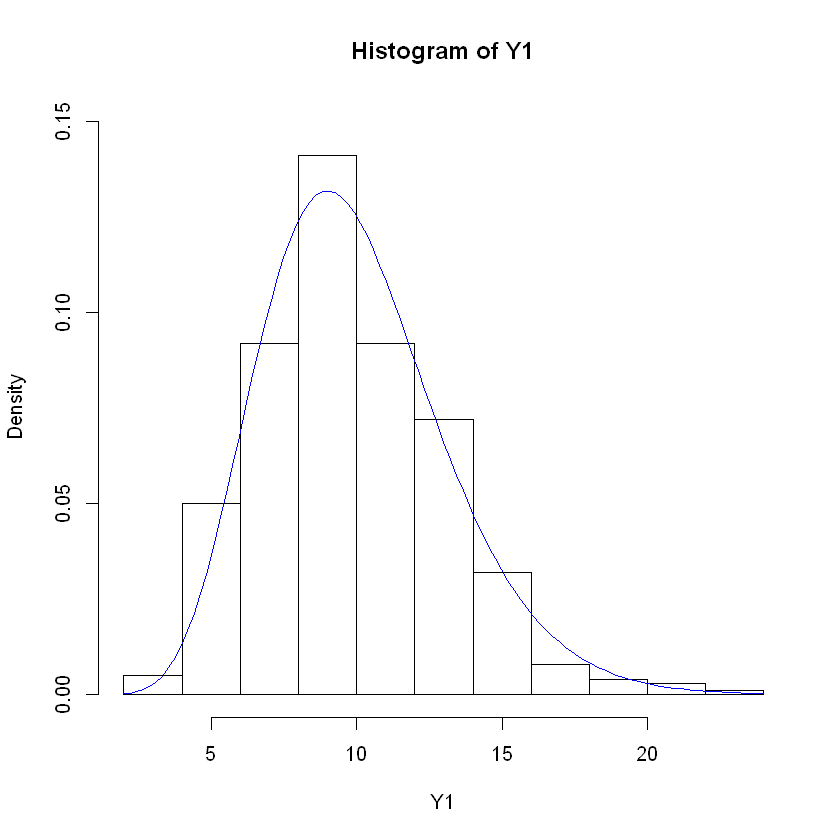

In [106]:
nrow0=500
ncol0=10 
X1=matrix(rgamma(nrow0*ncol0, shape=1, scale=1), nrow=nrow0) 
Y1=rowSums(X1)
hist(Y1, freq = FALSE, ylim = range(0,0.15))
f=function(x){dgamma(x,shape=10)} 
curve(f, add=TRUE, col='blue')

In [117]:
cat("Distribution Mean = ", mean(Y1), "\nDistribution Variance = ", var(Y1))


Distribution Mean =  9.83993 
Distribution Variance =  10.061

The probability distribution of Y1 is a gamma distribution with parameters 1 and 10.

# Problem 4

## (4a)

In [137]:
# Create matrix of of the 1000 samples of size 500 
nsamples=1000 
samplesize=50 
mat.samples=matrix(rpois(nsamples*samplesize, lambda=5), nrow=samplesize, ncol=nsamples) 
# Use apply to compute MOM estimates 
mat.samples.mom1<-colMeans(mat.samples) 
mat.samples.mom2<-colMeans(mat.samples^2) - colMeans(mat.samples)^2


In [140]:
M = 1000
lambda_mse_1 = 1/M*sum((mat.samples.mom1-5)^2)
lambda_mse_2 = 1/M*sum((mat.samples.mom2-5)^2)

lambda_rmse_1 = sqrt(lambda_mse_1)
lambda_rmse_2 = sqrt(lambda_mse_2)

cat("MSE(lambda_1) = ", lambda_mse_1, "\nMSE(lambda_2) = ", lambda_mse_2 )
cat("\nRMSE(lambda_1) = ", lambda_rmse_1, "\nRMSE(lambda_2) = ", lambda_rmse_2 )

MSE(lambda_1) =  0.0945128 
MSE(lambda_2) =  1.033818
RMSE(lambda_1) =  0.3074293 
RMSE(lambda_2) =  1.016768

## (4b)

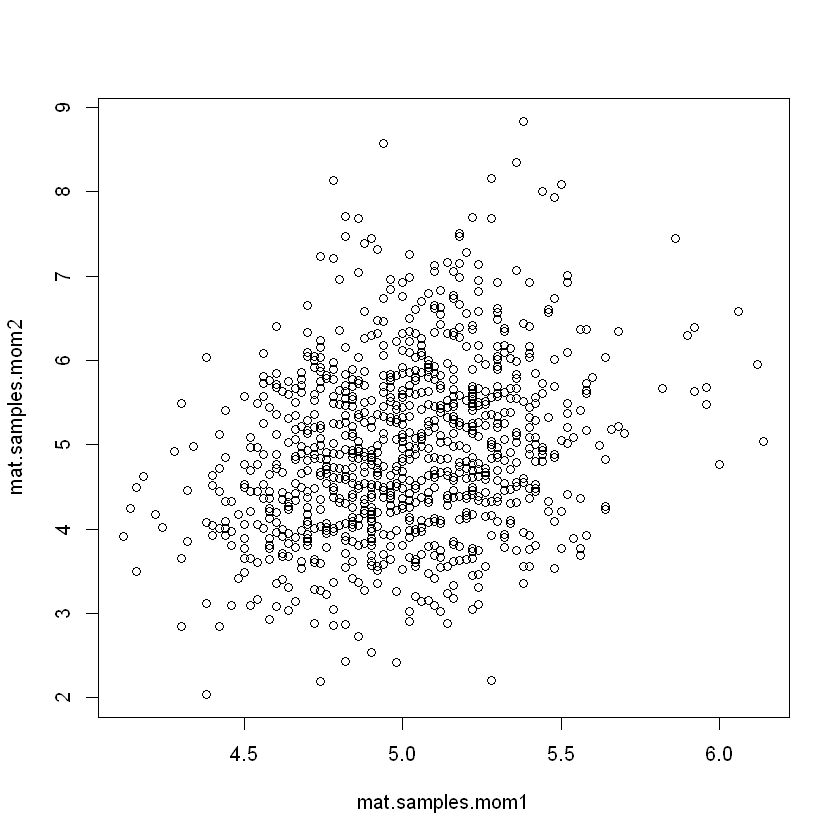

In [167]:
plot(mat.samples.mom1,mat.samples.mom2)

In [195]:
cor(mat.samples.mom1, mat.samples.mom2)

[1] 0.2604286

## (4c)


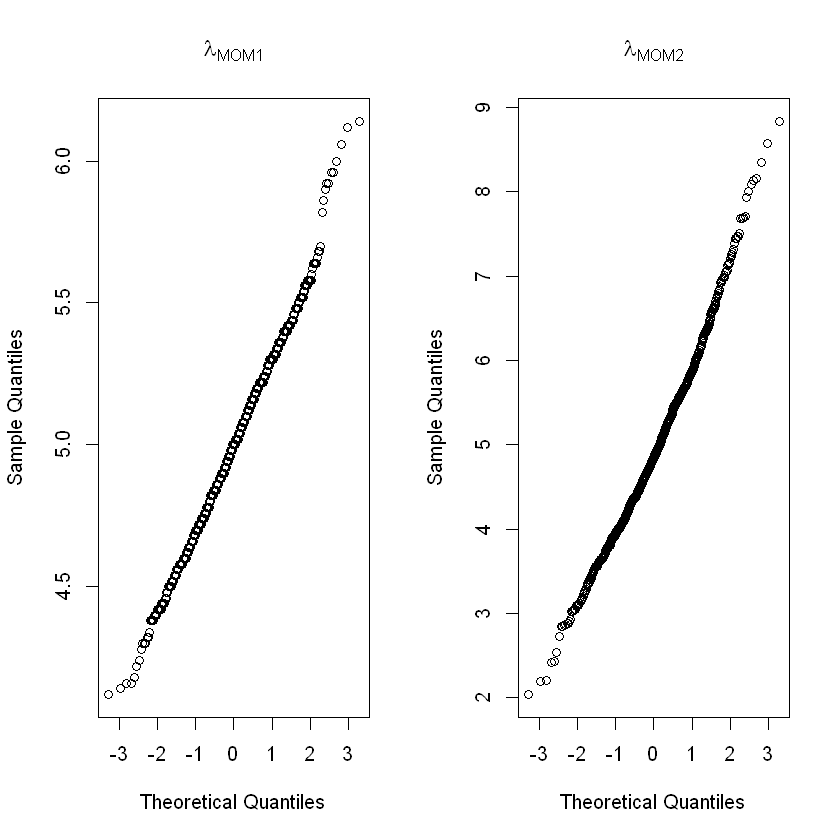

In [203]:
par(mfcol=c(1,2))
qqnorm(mat.samples.mom1, main = expression(lambda [MOM1]))

qqnorm(mat.samples.mom2, main = expression(lambda [MOM2]))

It seems like both of the estimates are very close to a Normal distribution. However it looks like the first one is actually closer because the first method of moments gives more accurate results.